In [ ]:
!nvidia-smi

Tue Feb 25 15:11:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.8/112.6 GB disk)


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HI5xe5CEd3pJ3jm0SeEl")
project = rf.workspace("yeeun-gud4w").project("main-fashion-aoir5")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Main-Fashion-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Main-Fashion-1/valid/labels.cache... 304 images, 0 backgrounds, 0 corrupt: 100% 304/304 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:06<00:00,  2.90it/s]
                   all        304        547       0.42      0.636      0.536      0.389
                Tshirt         73         93      0.446      0.828      0.695      0.518
                jacket         25         29      0.507      0.604      0.593      0.337
            long-dress         20         29      0.421      0.651      0.551      0.358
            long-skirt         21         24      0.323        0.5      0.313      0.225
            midi-dress         15         16      0.282      0.438      0.269      0.214
            midi-skirt 

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs

image 1/170 /content/datasets/Main-Fashion-1/test/images/045e20b0592d4fb61d5a5f4b8a8ba6bf_jpg.rf.6804fe996049f5b3d2b5ef583f996c24.jpg: 800x800 1 Tshirt, 22.9ms
image 2/170 /content/datasets/Main-Fashion-1/test/images/1588753551723_7169ryxt2v4_png_jpg.rf.6fb35f06fa0308ab370bb5f4bd6b78c7.jpg: 800x800 2 Tshirts, 22.9ms
image 3/170 /content/datasets/Main-Fashion-1/test/images/1590122676583_omcucvx5g5o_jpg.rf.8ee191533fa680d71624a7e06b41b1be.jpg: 800x800 2 Tshirts, 22.9ms
image 4/170 /content/datasets/Main-Fashion-1/test/images/1605496729823_ci0o5aow9x_jpg.rf.30b00d5e25a49d14169b87914d1b9f8e.jpg: 544x800 1 Tshirt, 38.3ms
image 5/170 /content/datasets/Main-Fashion-1/test/images/1606698821244_ztadcdt1pph_jpg.rf.0624865315f45e1c18dda5359becce14.jpg: 800x800 1 Tshirt, 1 pants, 1 shirt, 1 short, 23.7ms
image 6/170 /co

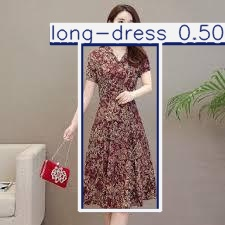

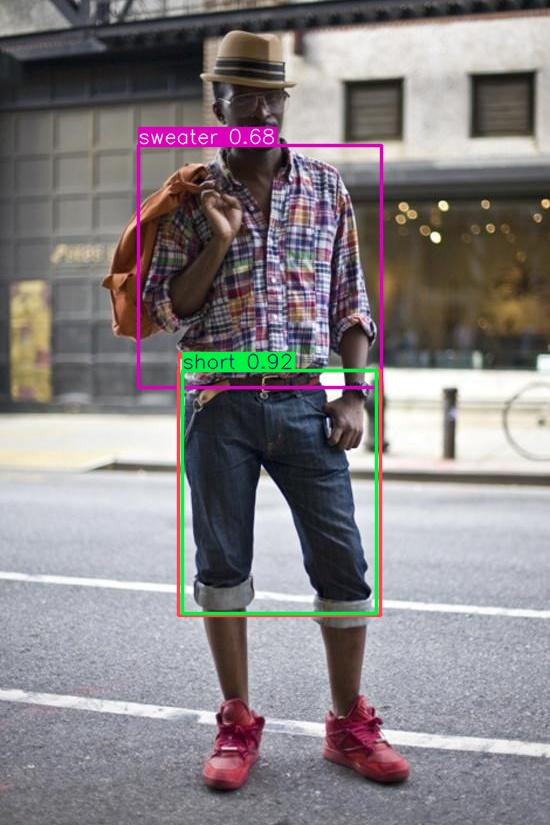

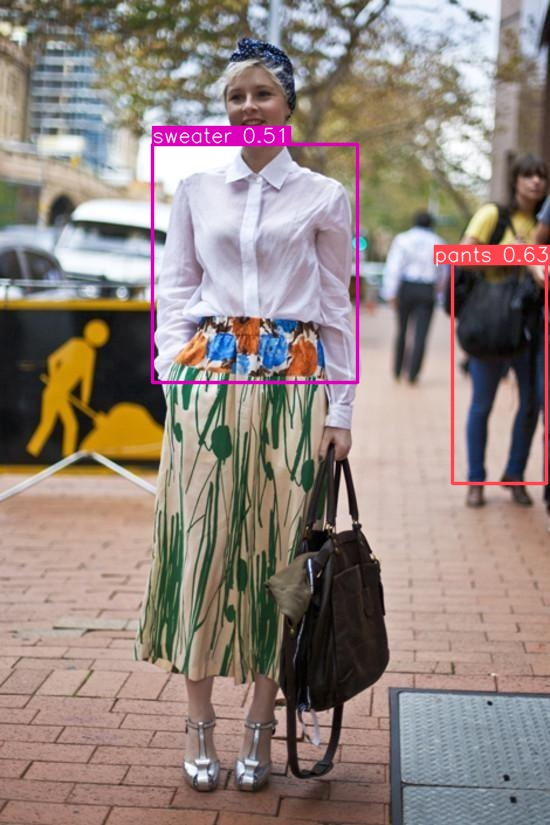

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
Image(os.path.join('/content/yolov5/runs/detect/exp4', os.path.basename(val_img_path)))